In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
df = pd.read_csv('/Users/yashpatawari/LLM_VLM_Comparison/Evaluation Datasheet - Individual Score.csv')
df.head()

df2 = pd.read_csv('/Users/yashpatawari/LLM_VLM_Comparison/Evaluation Datasheet - Individual Score with Ground truth.csv')


In [40]:
methods = df['Method']
print(methods)

methods_list = methods.tolist()
print(type(methods_list))

methods_list2 = df2['Method'].tolist()



0             LLM-Zero Shot
1              LLM-One Shot
2              LLM-Two Shot
3             LLM-Four Shot
4                   LLM-RAG
5             LLM-Fine Tune
6    VLM-No Object Detector
7             VLM-Zero Shot
8              VLM-One Shot
9             VLM-Fine Tune
Name: Method, dtype: object
<class 'list'>


In [41]:
gpt = df['ChatGPT'].tolist()
gemini = df['Gemini'].tolist()
c4 = df['c4 AI Command R+'].tolist()

print(gpt)
print(gemini)
print(c4)
print("2nd DF")


gpt2 = df2['ChatGPT'].tolist()
gemini2 = df2['Gemini'].tolist()
c42 = df2['c4 AI Command R+'].tolist()

print(gpt2)
print(gemini2)
print(c42)

[8.3, 8.2, 8.6, 9.0, 8.4, 8.4, 5.6, 8.2, 8.0, 8.0]
[8.1, 8.1, 8.2, 8.2, 9.0, 8.4, 3.8, 7.6, 7.6, 8.8]
[8.2, 8.4, 8.8, 9.0, 9.0, 9.0, 7.4, 8.3, 8.9, 8.8]
2nd DF
[6.2, 6.9, 6.6, 7.8, 8.0, 7.3, 4.0, 6.2, 6.2, 7.0]
[7.2, 7.8, 7.4, 5.0, 9.0, 8.6, 3.6, 7.0, 6.34, 8.1]
[7.2, 7.3, 7.4, 7.2, 9.4, 8.2, 2.2, 7.5, 6.8, 8.3]


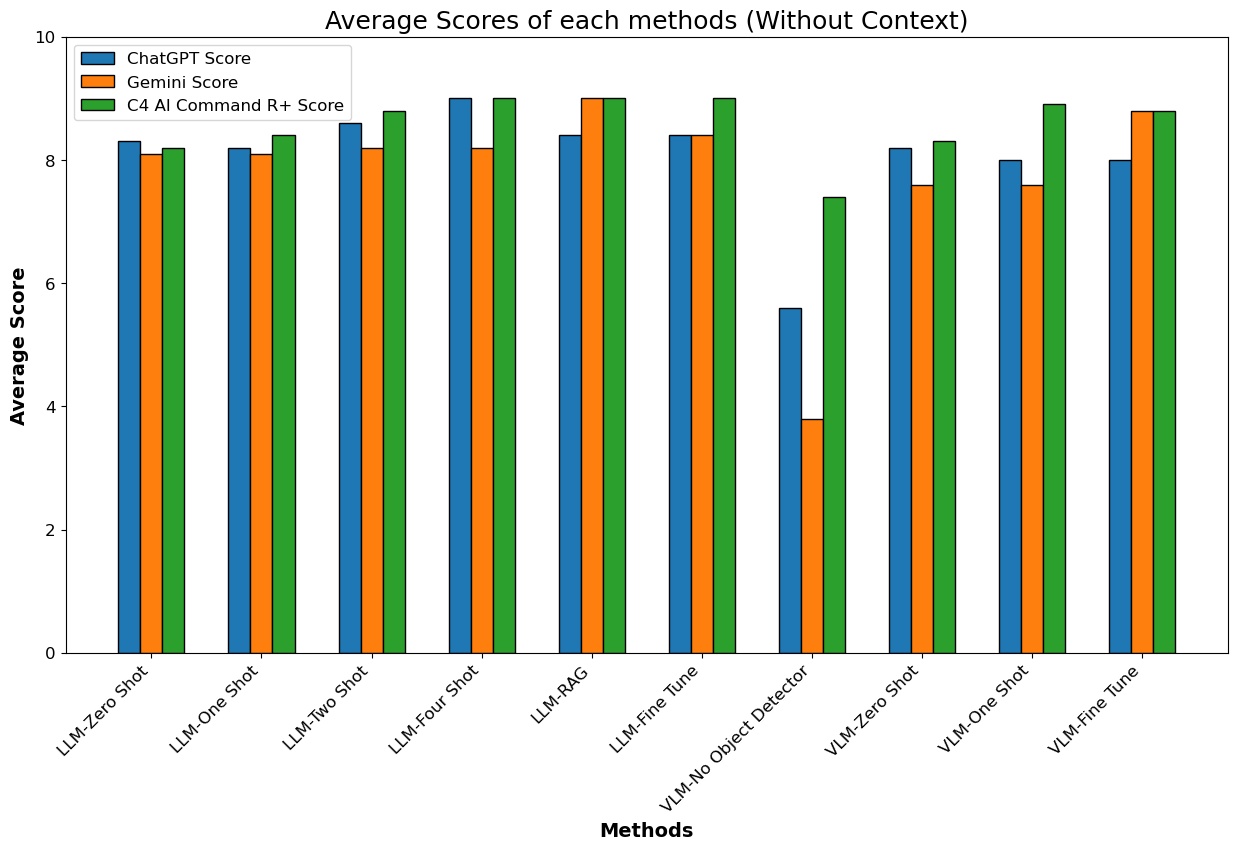

In [38]:
bar_width = 0.2

r1 = np.arange(len(methods_list))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(15, 8))

plt.bar(r1, gpt, color=colors[0], width=bar_width, edgecolor='black', label='ChatGPT Score')
plt.bar(r2, gemini, color=colors[1], width=bar_width, edgecolor='black', label='Gemini Score')
plt.bar(r3, c4, color=colors[2], width=bar_width, edgecolor='black', label='C4 AI Command R+ Score')

plt.xlabel('Methods', fontweight='bold', fontsize=14)
plt.ylabel('Average Score', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(methods_list))], methods_list, fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0,10)
plt.title('Average Scores of each methods (Without Context)', fontsize=18)

# plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize=12)
plt.show()

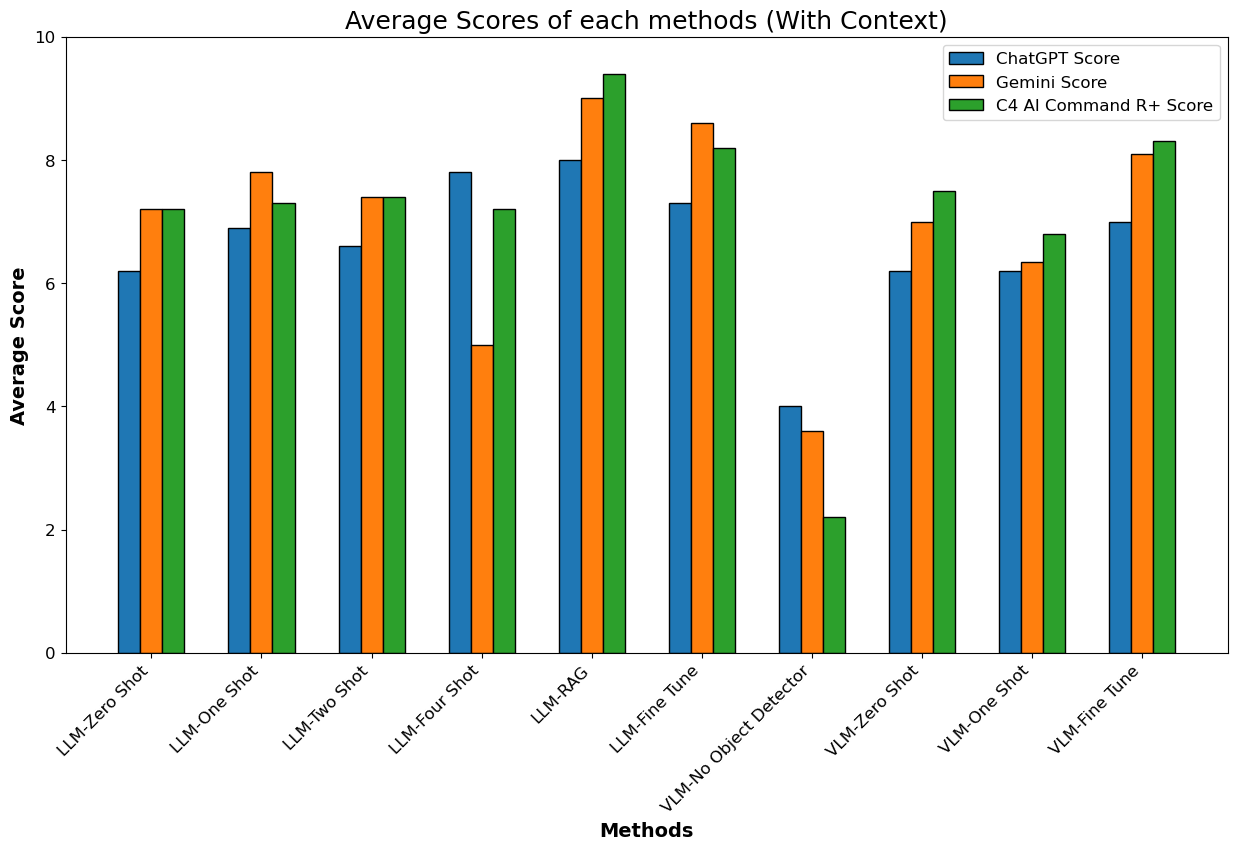

In [42]:
bar_width = 0.2

r1 = np.arange(len(methods_list2))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width*2 for x in r1]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.figure(figsize=(15, 8))

plt.bar(r1, gpt2, color=colors[0], width=bar_width, edgecolor='black', label='ChatGPT Score')
plt.bar(r2, gemini2, color=colors[1], width=bar_width, edgecolor='black', label='Gemini Score')
plt.bar(r3, c42, color=colors[2], width=bar_width, edgecolor='black', label='C4 AI Command R+ Score')

plt.xlabel('Methods', fontweight='bold', fontsize=14)
plt.ylabel('Average Score', fontweight='bold', fontsize=14)
plt.xticks([r + bar_width for r in range(len(methods_list2))], methods_list2, fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.ylim(0,10)
plt.title('Average Scores of each methods (With Context)', fontsize=18)

# plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(fontsize=12)
plt.show()